In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
alpha = 0.05
positive = 1
total = 50

In [42]:
from scipy import stats
z = sp.stats.norm.ppf(1 - alpha/2)
corr_z = z**2 / (2*total)
p1 = positive / total
p2 = (total - positive) / total
delta = z * np.sqrt(p1 * p2 / total + z**2 / (4 * total**2))
high = (p1 + z**2 / (2*total) + delta) / (1 + z**2/total)
low = (p1 + z**2 / (2*total) - delta) / (1 + z**2/total)
low, high

(0.003539259271646236, 0.10495443589637815)

In [38]:
high = p1 + z*np.sqrt(p1*p2 / total)
low = p1 - z*np.sqrt(p1*p2 / total)
low, high

(-0.018805307081790974, 0.05880530708179098)

In [40]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(1, 50, method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

In [25]:
from statsmodels.stats.proportion import samplesize_confint_proportion

n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples

753

In [31]:
import matplotlib.pyplot as plt

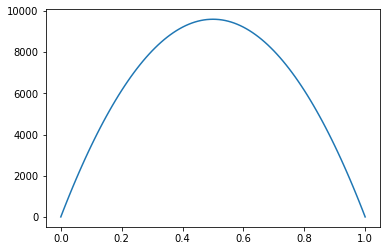

In [32]:
p = np.linspace(0, 1, 101)
s_size = [int(np.ceil(samplesize_confint_proportion(p_value, 0.01))) for p_value in p]
plt.plot(p, s_size)

In [33]:
np.max(s_size)

9604

In [35]:
normal_interval = proportion_confint(1, 50, method = 'normal')
normal_interval

(0.0, 0.05880530708179099)

In [43]:
sp.stats.norm.ppf(1 - 0.003/2)

2.9677379253417944

In [45]:
n1 = 11037
n2 = 11034
p1 = 104 / n1
p2 = 189 / n2

delta = z * np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
diff = p1 - p2
diff_high = diff + delta
diff_low = diff - delta
diff_low, diff_high, diff

(-0.010724297276960124, -0.004687750675049439, -0.0077060239760047815)

In [62]:
(p2/(1-p2)) / (p1/(1-p1))

1.8320539419087138

In [47]:
plac = np.array([1]*189 + [0]*(11034-189))
test = np.array([1]*104 + [0]*(11037-104))

np.random.seed(0)
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

plac_bootstrap = get_bootstrap_samples(plac, 1000)
test_bootstrap = get_bootstrap_samples(test, 1000)
plac_bootstrap.shape, test_bootstrap.shape

((1000, 11034), (1000, 11037))

In [66]:
def odds(sample1, sample2):
    p1 = np.sum(sample1, axis=1) / sample1[1].shape
    p2 = np.sum(sample2, axis=1) / sample2[1].shape
    return (p1 / (1-p1)) / (p2 / (1-p2))

test_odds = odds(plac_bootstrap, test_bootstrap)

In [67]:
stat_intervals(test_odds, 0.05)

array([1.46286276, 2.35093673])